In [52]:
import tensorflow as tf
from tensorflow import keras
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report

In [53]:
(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
y_test_original = y_test

In [54]:
class_names = ['Camisetas/Top', 'Calça', 'Suéter',
               'Vestidos','Casaco', 'Sandálias',
               'Camisas', 'Tênis', 'Bolsa', 'Botas']

In [55]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [56]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0, 155, 236, 207, 178, 107, 156, 161, 109,  64,  23,  77, 130,
         72,  15],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0,
         69, 207, 223, 218, 216, 216, 163, 127, 121, 122, 146, 141,  88,
        172,  66],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   1,   1,   0,
        200, 232, 232, 233, 229, 223, 223, 215, 213, 164, 127, 123, 196,
        229,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        183, 225, 216, 223, 228, 235, 227, 224, 222, 224, 221, 223, 245,
        173,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        193, 228, 218, 213, 198, 180, 212, 210, 211, 213, 223, 220, 243,
        202,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   3,   0,  12,
        219, 220, 212, 218, 192, 169, 227, 208, 218, 224, 212, 226, 197,
        209,  52],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,   0,  99,
        244, 222, 220, 218, 203, 198, 221, 215, 213, 222, 220, 245, 119,
        167,  56],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   4,   0,   0,  55,
        236, 228, 230, 228, 240, 232, 213, 218, 223, 234, 217, 217, 209,
         92,   0],
       [  0,   0,   1,   4,   6,   7,   2,   0,   0,   0,   0,   0, 237,
        226, 217, 223, 222, 219, 222, 221, 216, 223, 229, 215, 218, 255,
         77,   0],
       [  0,   3,   0,   0,   0,   0,   0,   0,   0,  62, 145, 204, 228,
        207, 213, 221, 218, 208, 211, 218, 224, 223, 219, 215, 224, 244,
        159,   0],
       [  0,   0,   0,   0,  18,  44,  82, 107, 189, 228, 220, 222, 217,
        226, 200, 205, 211, 230, 224, 234, 176, 188, 250, 248, 233, 238,
        215,   0],
       [  0,  57, 187, 208, 224, 221, 224, 208, 204, 214, 208, 209, 200,
        159, 245, 193, 206, 223, 255, 255, 221, 234, 221, 211, 220, 232,
        246,   0],
       [  3, 202, 228, 224, 221, 211, 211, 214, 205, 205, 205, 220, 240,
         80, 150, 255, 229, 221, 188, 154, 191, 210, 204, 209, 222, 228,
        225,   0],
       [ 98, 233, 198, 210, 222, 229, 229, 234, 249, 220, 194, 215, 217,
        241,  65,  73, 106, 117, 168, 219, 221, 215, 217, 223, 223, 224,
        229,  29],
       [ 75, 204, 212, 204, 193, 205, 211, 225, 216, 185, 197, 206, 198,
        213, 240, 195, 227, 245, 239, 223, 218, 212, 209, 222, 220, 221,
        230,  67],
       [ 48, 203, 183, 194, 213, 197, 185, 190, 194, 192, 202, 214, 219,
        221, 220, 236, 225, 216, 199, 206, 186, 181, 177, 172, 181, 205,
        206, 115],
       [  0, 122, 219, 193, 179, 171, 183, 196, 204, 210, 213, 207, 211,
        210, 200, 196, 194, 191, 195, 191, 198, 192, 176, 156, 167, 177,
        210,  92],
       [  0,   0,  74, 189, 212, 191, 175, 172, 175, 181, 185, 188, 189,
        188, 193, 198, 204, 209, 210, 210, 211, 188, 188, 194, 192, 216,
        170,   0],
       [  2,   0,   0,   0,  66, 200, 22

In [57]:
np.unique(y_train, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))

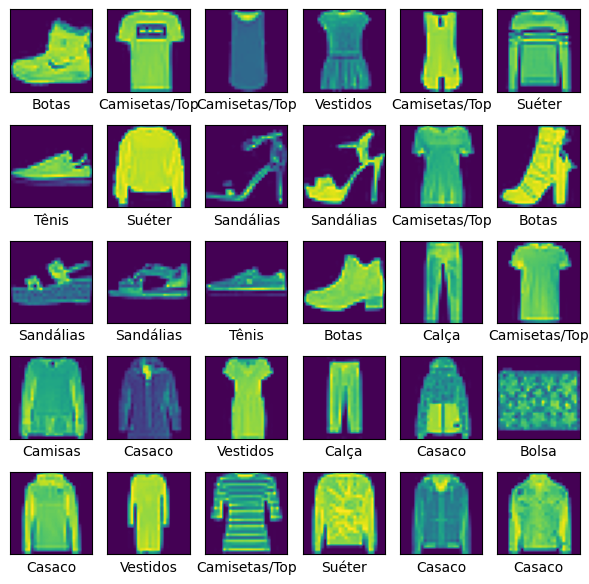

In [58]:
plt.figure(figsize=(6,6))
for i in range(30):
    plt.subplot(5,6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i])
    plt.xlabel(class_names[y_train[i]])
plt.tight_layout()

In [59]:
normalizador = lambda x: (x/255.0).astype('float32')
X_train = normalizador(X_train)
X_test = normalizador(X_test)

In [60]:
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))

X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [61]:
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

In [62]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(32, 3, padding="same", activation='relu',))
model.add(keras.layers.BatchNormalization(axis=1))
model.add(keras.layers.Conv2D(32, (3, 3), padding="same", activation='relu'))
model.add(keras.layers.BatchNormalization(axis=1))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Dropout(0.25))

model.add(keras.layers.Conv2D(64, (3, 3), padding="same", activation='relu'))
model.add(keras.layers.BatchNormalization(axis=1))
model.add(keras.layers.Conv2D(64, (3, 3), padding="same", activation='relu'))
model.add(keras.layers.BatchNormalization(axis=1))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Dropout(0.25))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(512, activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(10, activation='softmax'))

In [63]:
model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])

In [64]:
treinamento = model.fit(X_train, y_train, epochs=10, validation_split=0.3)

Epoch 1/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 19s 9ms/step - accuracy: 0.7524 - loss: 0.7361 - val_accuracy: 0.8268 - val_loss: 0.4973
Epoch 2/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.8803 - loss: 0.3376 - val_accuracy: 0.9052 - val_loss: 0.2627
Epoch 3/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.8934 - loss: 0.2962 - val_accuracy: 0.9086 - val_loss: 0.2611
Epoch 4/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8993 - loss: 0.2754 - val_accuracy: 0.9154 - val_loss: 0.2304
Epoch 5/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9077 - loss: 0.2542 - val_accuracy: 0.9046 - val_loss: 0.2618
Epoch 6/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9146 - loss: 0.2335 - val_accuracy: 0.9236 - val_loss: 0.2179
Epoch 7/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9180 - loss: 0.2232 - val_accuracy: 0.9261 - val_loss: 0.2028
Epoch 8/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9218 - loss: 0.2144

In [65]:

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
print(classification_report(y_test_original, y_pred_classes, target_names=class_names))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
               precision    recall  f1-score   support

Camisetas/Top       0.86      0.89      0.88      1000
        Calça       1.00      0.98      0.99      1000
       Suéter       0.91      0.90      0.91      1000
     Vestidos       0.93      0.93      0.93      1000
       Casaco       0.88      0.89      0.89      1000
    Sandálias       0.98      0.98      0.98      1000
      Camisas       0.78      0.77      0.77      1000
        Tênis       0.95      0.98      0.97      1000
        Bolsa       0.99      0.98      0.99      1000
        Botas       0.98      0.96      0.97      1000

     accuracy                           0.93     10000
    macro avg       0.93      0.93      0.93     10000
 weighted avg       0.93      0.93      0.93     10000



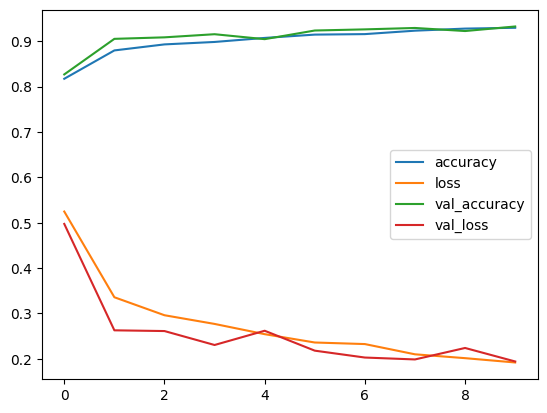

In [66]:
pd.DataFrame(treinamento.history).plot()
plt.show()

In [69]:
score = model.evaluate(X_test, y_test)
print('Loss: {:.3f}'.format(score[0]))
print('Acurácia: {:.3f}'.format(score[1]))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9259 - loss: 0.2220
Loss: 0.209
Acurácia: 0.928
